### Lab Quiz 1 (L2A) Solutions

**Question 1**

In [1]:
def next_square(a):
    "Return the smallest square integer greater than or equal to a."
    if a <= 0:
        return 0
    elif round(a**0.5)**2 == a:
        # If a is already a square, return a
        return a
    else:
        # Compute next square: compute the
        # square root, round down, add 1 and square
        return (int(a**0.5) + 1)**2

In [2]:
test1 = (next_square(-1) == 0)
test2 = (next_square(0) == 0)
test3 = (next_square(0.5) == 1)
test4 = (next_square(1) == 1)
test5 = (next_square(25) == 25)
test6 = (next_square(26) == 36)
test7 = (next_square(99) == 100)
print(test1,test2,test3,test4,test5,test6,test7)

True True True True True True True


**Question 2**

In [3]:
def a_sequence(N):
    '''Compute recursive sequence a(1),...,a(N) where a(n) = a(a(n - 2)) + a(n - a(n - 2)) and a(1) = a(2) = 1.
    
    Input:
        N : integer, length of sequence to return
    
    Output:
        Python list of integers of length N giving the sequence defined by the recurrence relation:
        a(n) = a(a(n - 2)) + a(n - a(n - 2)) and a(1) = a(2) = 1
    '''
    if N == 1:
        return [1]
    if N == 2:
        return [1,1]
    # Definition of sequence begins at index 1 therefore
    # insert 0 at index 0 so that sequence index matches
    # Python list index [a(0),a(1),a(2),...,a(N)]
    a = [0,1,1]
    for n in range(3,N+1):
        an = a[a[n - 2]] + a[n - a[n - 2]]
        a.append(an)
    return a[1:] # Return list from index 1 to N

In [7]:
test1 = (a_sequence(3) == [1,1,2])
test2 = (a_sequence(4) == [1,1,2,3])
test3 = (a_sequence(5) == [1,1,2,3,3])
test4 = (a_sequence(10) == [1, 1, 2, 3, 3, 4, 5, 6, 6, 7])
print(test1,test2,test3,test4)

True True True True


**Question 3**

In [8]:
def poly_int(p,a,b):
    '''Compute the integral of p(x) over the interval [a,b].
    
    Use the Fundamental Theorem of Calculus to compute the integral of p(x) over the interval [a,b]:
    
    \int_a^b p(x) = P(b) - P(a)
    
    where P(x) is an antiderivative of p(x).
    
    Input:
        p : list representing a polnomial function p(x) = a0 + a1*x + a2*x**2 + ... + an*x**n
        a,b : integers defining interval [a,b]
    Output:
        Value of the integral of p(x) over the interval [a,b].
    '''
    deg = len(p) - 1
    
    # Compute an antiderivative P(x) of p(x) (with constant term 0)
    P = [0] + [p[k]/(1+k) for k in range(0,deg+1)]
    
    # Evaluate P(x) at x=b
    Pb = sum([P[k]*b**k for k in range(0,deg+2)])
    
    # Evaluate P(x) at x=a
    Pa = sum([P[k]*a**k for k in range(0,deg+2)])
    
    return Pb - Pa

In [13]:
epsilon = 10e-12
test1 = abs(poly_int([1],1,2) - 1) < epsilon
test2 = abs(poly_int([1,1,1],1,3) - ((3+3**2/2+3**3/3) - (1+1/2+1/3))) < epsilon
test3 = abs(poly_int([1,0,0,0,-1],-1,3) - ((3 - 1/5*3**5) - (-1 - 1/5*(-1)**5))) < epsilon
print(test1,test2,test3)

True True True


**Question 4(a)**

$$
\int_0^{\infty} \frac{\arctan qx}{(p+x)^2} \, dx = - \frac{q}{1 + p^2 q^2} \left( \ln pq - \frac{\pi}{2}pq \right) \ , \ p > 0 , \ q > 0
$$

**Question 4(b)**

In [45]:
import numpy as np

def pq_integral(p,q,b,N):
    '''Compute Riemann sum of arctan(q*x) / (p + x)**2 from 0 to b using midpoints.

    Input:
        p,q : numbers greater than 0
        b : number greater than 0 defining upper limit if integration
        N : integer, the number of subintervals of the interval [0,b]
        
    Output:
        Riemann sum approximating the integral of arctan(q*x) / (p + x)**2
        from 0 to b using the midpoints.    
    '''
    Delta_x = b/N
    x = np.linspace(0,b,N+1)
    midpoints = (x[:-1] + x[1:])/2
    y = np.arctan(q*midpoints) / (p + midpoints)**2
    return np.sum(y)*Delta_x

In [46]:
epsilon = 10e-14
test1 = abs(pq_integral(1,1,1,1) - np.arctan(0.5)/1.5**2) < epsilon
test2 = abs(pq_integral(2,5,1,5) - 0.2*(np.arctan(5*0.1)/(2+0.1)**2 + np.arctan(5*0.3)/(2+0.3)**2 + np.arctan(5*0.5)/(2+0.5)**2 + np.arctan(5*0.7)/(2+0.7)**2 + np.arctan(5*0.9)/(2+0.9)**2)) < epsilon
print(test1,test2)

True True


**Question 5**

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
def flower_plot(a,N):
    '''Plot the parametric curve given by x(t) = cos(at)*cos(t) and y(t) = cos(at)*sin(t) for t in [0,2pi].
    
    Input:
        a : integer
        N : integer, the number of points to use in the plot

    Output:
        NumPy array of size N by 2 with x values in first column and y values in second column.
    '''
    t = np.linspace(0,2*np.pi,N)
    x = np.cos(a*t)*np.cos(t)
    y = np.cos(a*t)*np.sin(t)
    plt.plot(x,y)
    plt.axis('equal'), plt.axis('off')
    M = np.vstack([x,y]).T
    return M

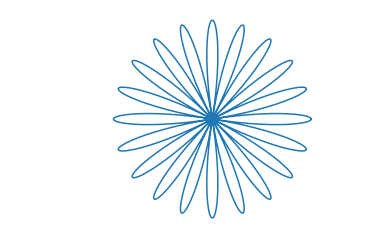

In [56]:
flower_plot(10,1000);

True True


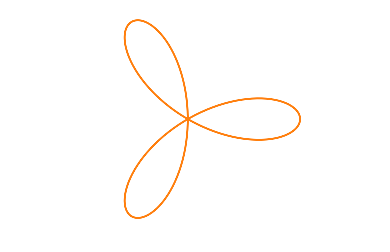

In [66]:
epsilion = 10e-12
test1 = np.linalg.norm(flower_plot(0,2) - np.array([[1,0],[1,0]])) < epsilon
test2 = np.linalg.norm(flower_plot(3,1000) - np.array([[np.cos(3*t)*np.cos(t) for t in np.linspace(0,2*np.pi,1000)],[np.cos(3*t)*np.sin(t) for t in np.linspace(0,2*np.pi,1000)]]).T) < epsilon
print(test1,test2)